In [61]:
%matplotlib notebook
import matplotlib.pyplot as plt
import json

TWEETS_DATA_PATH = '03_twitter_streams_storing/tweet_mining.json'

def read_json(file_path):
    results = []
    with open(TWEETS_DATA_PATH) as tweets_file:
        for tweet_line in tweets_file:
            try:
                status = json.loads(tweet_line)
                results.append(status)
            except ValueError:
                pass
        return results

In [62]:
import re

def is_token_in_tweet_text(token, tweet_text):
    token = token.lower()
    tweet_text = ''.join(tweet_text).lower()
    match = re.search(token, tweet_text)
    if match:
        return True
    return False

results  = read_json(TWEETS_DATA_PATH)

In [72]:
import pandas

statuses = pandas.DataFrame()

statuses['text'] = [status['text'] for status in results]

statuses['python'] = statuses['text'].apply(lambda status: is_token_in_tweet_text('python', status))
statuses['javascript'] = statuses['text'].apply(lambda status: is_token_in_tweet_text('javascript', status))
statuses['c'] = statuses['text'].apply(lambda status: is_token_in_tweet_text('c ', status))
statuses['php'] = statuses['text'].apply(lambda status: is_token_in_tweet_text('php', status))


# Output the number of tweets where it is true that they contain our keywords
print(statuses['python'].value_counts()[True])
print(statuses['javascript'].value_counts()[True])
print(statuses['c'].value_counts()[True])
print(statuses['php'].value_counts()[True])


5
4
19
5


<IPython.core.display.Javascript object>


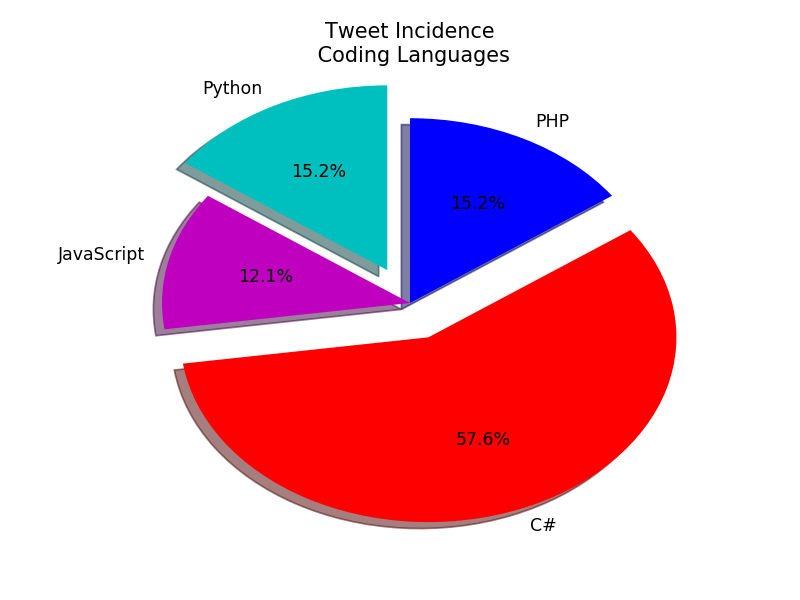

In [73]:
def lang_pie():
    slices = [statuses['python'].value_counts()[True],
             statuses['javascript'].value_counts()[True],
             statuses['c'].value_counts()[True],
             statuses['php'].value_counts()[True]]
    activities = ['Python', 'JavaScript', 'C#', 'PHP']
    cols = ['c', 'm', 'r', 'b']
    
    plt.pie(slices, colors = cols, labels = activities,
           startangle = 90, shadow = True, explode = (0.2, 0, 0.2, 0),
           autopct = '%1.1f%%')
    
    plt.title('Tweet Incidence\n Coding Languages')
    plt.show()
    
lang_pie()